# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: The "wine quality" dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [1]:
### import libraries

# for DL modeling
import torch
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from rich import print

# Import and process the data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# describe the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# list number of unique values per column

uvalues = []
ovalues = {}
for i in data.keys():
  print(f'{i} has {len(np.unique(data[i]))} unique values')
  uvalues.append(len(np.unique(data[i])))
  ovalues[i] = len(np.unique(data[i]))
  
print(f'\nUnique values per column (sorted): {sorted(uvalues)}')
print(f'\nUnique values per column (dict)')
# pretty print the dictionary:
import json
print(json.dumps(ovalues, indent=4))
  


fixed acidity has 96 unique values

volatile acidity has 143 unique values

citric acid has 80 unique values

residual sugar has 91 unique values

chlorides has 153 unique values

free sulfur dioxide has 60 unique values

total sulfur dioxide has 144 unique values

density has 436 unique values

pH has 89 unique values

sulphates has 96 unique values

alcohol has 65 unique values

quality has 6 unique values

Unique values per column (sorted): [6, 60, 65, 80, 89, 91, 96, 96, 143, 144, 153, 436]

Unique values per column (dict)

{
    "fixed acidity": 96,
    "volatile acidity": 143,
    "citric acid": 80,
    "residual sugar": 91,
    "chlorides": 153,
    "free sulfur dioxide": 60,
    "total sulfur dioxide": 144,
    "density": 436,
    "pH": 89,
    "sulphates": 96,
    "alcohol": 65,
    "quality": 6
}

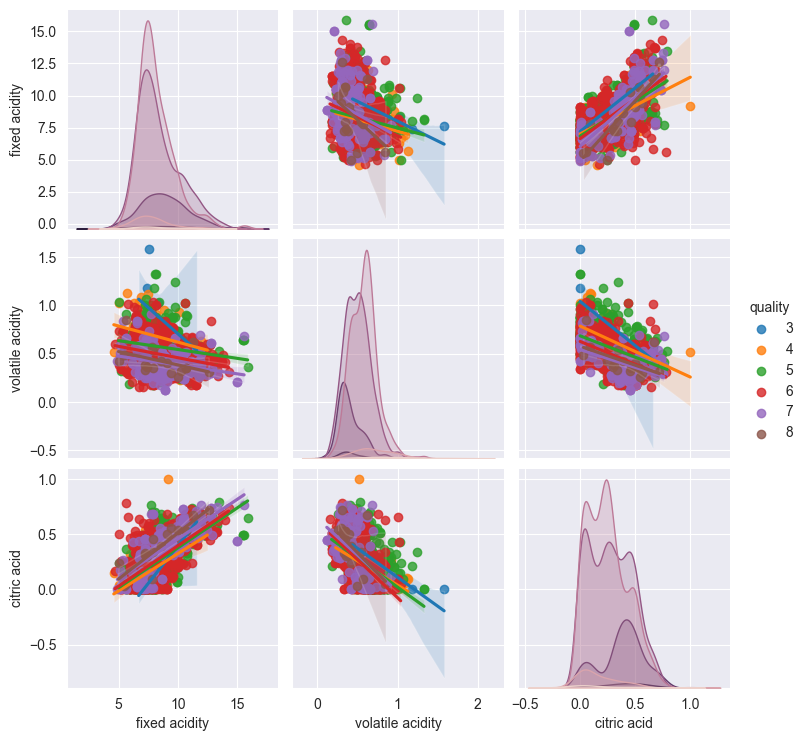

In [5]:
# pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9920\84439280.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


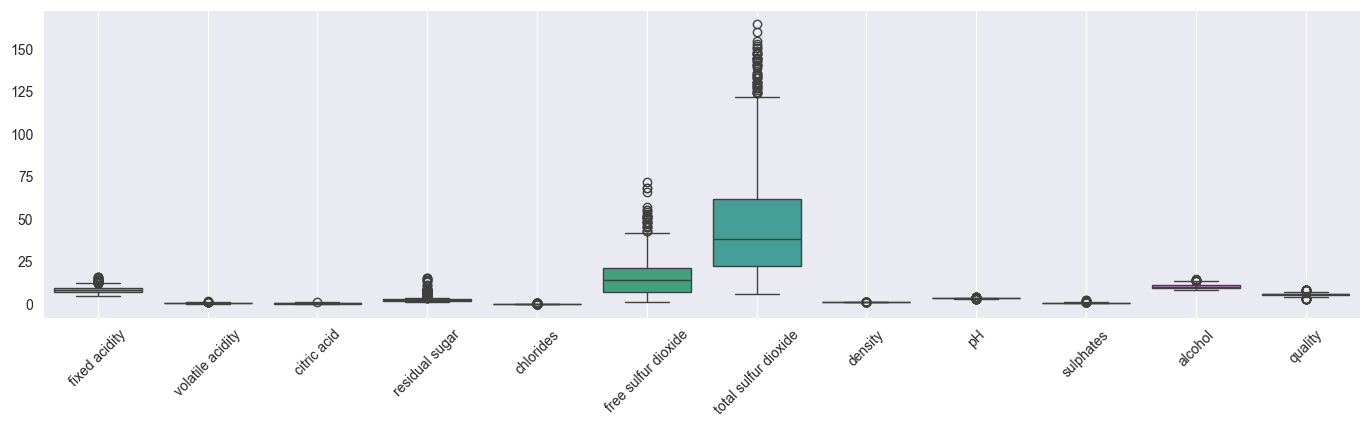

In [6]:
# remove rows with outliers
data = data[data["total sulfur dioxide"] < 200]

# plot some data
fig, ax = plt.subplots(1, figsize=(17, 4))

ax = sns.boxplot(data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()

plt.show()

In [7]:
d = np.arange(0,100,1) + np.random.random(100)*10
x = np.random.random(100)*10 
plt.scatter(x,d)
# set x limits to -5 and 15:
plt.xlim(-5,15)
plt.show()

d.std()/

SyntaxError: invalid syntax (1841018517.py, line 8)

In [ ]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col],ddof=1)
  data[col] = (data[col]-meanval) / stdev

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

In [ ]:
# check the plot again
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

# Re-organize the data: train/test in DataLoaders

In [ ]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "tensor"
labels = labels[:,None]
print( labels.shape )

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 64
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
# check sizes of data batches
for X,y in train_loader:
  print(X.shape,y.shape)

# go back and set drop_last=True in training DataLoader

# Additional explorations

In [ ]:
# 1) In a later video, we will use DL to predict residual sugar. Use seaborn to make a histogram of that data column.
#    Spend a minute to explore the visualization options in sns.histplot. For example, you can add a kernel density 
#    estimate, make the histogram bars purple, and so on.
# 
# 2) (Warning: This exercise is for people who are familiar with statistics.) Loop over all the variables in the dataset,
#    and perform an independent-samples t-test on the data for the binarized wine quality. Which variables are significantly
#    different between "low" and "high" quality wine?
# 